## Team ID : PNT2022TMID37590
## Project Title : A Gesture-based Tool for Sterile Browsing of Radiology Images.

# Model Training

### Importing packages

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

### Image Data Argumentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

### Loading Our Data And Perform Data Argumentation

In [3]:
x_train = train_datagen.flow_from_directory(r'D:\IBM Project\Dataset\train', target_size=(64, 64), batch_size=3, color_mode='grayscale', class_mode='categorical')
x_test = test_datagen.flow_from_directory(r'D:\IBM Project\Dataset\test', target_size=(64, 64), batch_size=3, color_mode='grayscale', class_mode='categorical')

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [4]:
print(x_train.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


### Initializing The Model

In [5]:
model=Sequential()

### Adding CNN Layers

In [6]:
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [7]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [8]:
model.add(Flatten())

### Adding Dense Layers

In [9]:
model.add(Dense(units=512, activation='relu'))

In [10]:
model.add(Dense(units=6, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3

### Configure The Learning Process

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train The Model

In [13]:
model.fit_generator(x_train,
                    steps_per_epoch =594/3,
                    epochs=25,
                    validation_data=x_test,
                    validation_steps=30/3)

C:\Users\srina\AppData\Local\Temp/ipykernel_9384/1173897450.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,


Epoch 1/25
198/198 [==============================] - 19s 88ms/step - loss: 1.3609 - accuracy: 0.4764 - val_loss: 0.7358 - val_accuracy: 0.6667
Epoch 2/25
198/198 [==============================] - 17s 83ms/step - loss: 0.5948 - accuracy: 0.7525 - val_loss: 0.5594 - val_accuracy: 0.7667
Epoch 3/25
198/198 [==============================] - 15s 74ms/step - loss: 0.3788 - accuracy: 0.8468 - val_loss: 0.3211 - val_accuracy: 0.8333
Epoch 4/25
198/198 [==============================] - 16s 79ms/step - loss: 0.2756 - accuracy: 0.8805 - val_loss: 0.4424 - val_accuracy: 0.8000
Epoch 5/25
198/198 [==============================] - 15s 73ms/step - loss: 0.2200 - accuracy: 0.9242 - val_loss: 0.1211 - val_accuracy: 0.9667
Epoch 6/25
198/198 [==============================] - 14s 72ms/step - loss: 0.1728 - accuracy: 0.9377 - val_loss: 0.1738 - val_accuracy: 0.9333
Epoch 7/25
198/198 [==============================] - 13s 67ms/step - loss: 0.1086 - accuracy: 0.9630 - val_loss: 0.3307 - val_accuracy:

### Save The Model

In [14]:
model.save('gesture.h5')

In [15]:
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
     json_file.write(model_json)

# Model Testing

In [16]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("gesture.h5")

In [17]:
img = image.load_img(r'D:\IBM Project\Dataset\test\1\1.jpg', grayscale=True, target_size=(64,64))
x = image.img_to_array(img)
x.shape

C:\Users\srina\anaconda3\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


(64, 64, 1)

In [18]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 1)

In [19]:
pred_x = model.predict(x)
pred_x=np.argmax(pred_x,axis=1)
pred_x

1/1 [==============================] - 0s 201ms/step


array([1], dtype=int64)

In [20]:
index=['0', '1', '2', '3', '4', '5']
result=str(index[pred_x[0]])
result

'1'

In [21]:
import numpy as np
p=[]
for i in range(0,6):
  for j in range(0,5):
    img = image.load_img(r"D:\\IBM Project\\Dataset\test\\"+str(i)+"\\"+str(j)+".jpg", grayscale=True, target_size=(64,64))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = np.argmax(model.predict(x),axis=-1)
    p.append(pred)
print(p)

1/1 [==============================] - 0s 47ms/step
[array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([2], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([2], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([5], dtype=int64), array([5], dtype=int64), array([5], dtype=int64), array([5], dtype=int64), array([5], dtype=int64)]


In [22]:
result = []
index=['0','1','2','3','4','5']
for i in p:
  result.append(index[i[0]])
print(result)

['0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '2', '2', '1', '2', '2', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5']


Populating the interactive namespace from numpy and matplotlib


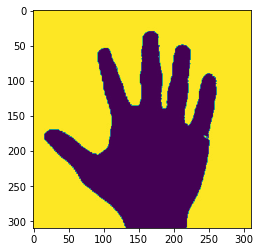

In [23]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(r"D:\IBM Project\Dataset\test\5\0.jpg")
imgplot = plt.imshow(imgs)
plt.show()